In [5]:
# Importamos librerías de análisis de datos
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None) # Deshabilita SettingWithCopyWarning. Ojo.

In [6]:
#Creamos el dataframe a partir del set de datos y les asigno un tipo acorde a las descripciones
df = pd.read_csv('data/train.csv', dtype={'titulo':'object','descripcion':'object',\
                                           'tipodepropiedad':'category', 'direccion':'object',\
                                           'ciudad':'category', 'provincia':'category',\
                                           'antiguedad':'float', 'habitaciones':'float',\
                                           'garages':'float','banos':'float',\
                                           'metroscubiertos':'float', 'metrostotales':'float',\
                                           'idzona':'float', 'lat':'float', 'lng':'float',\
                                           'gimnasio':'bool', 'usosmultiples':'bool',\
                                           'piscina':'bool', 'escuelascercanas':'bool',\
                                           'centroscomercialescercanos':'bool',\
                                           'precio':'float'}, parse_dates=['fecha'])
df.dtypes

id                                     int64
titulo                                object
descripcion                           object
tipodepropiedad                     category
direccion                             object
ciudad                              category
provincia                           category
antiguedad                           float64
habitaciones                         float64
garages                              float64
banos                                float64
metroscubiertos                      float64
metrostotales                        float64
idzona                               float64
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                                bool
usosmultiples                           bool
piscina                                 bool
escuelascercanas                        bool
centroscomercialescercanos              bool
precio    

In [7]:
nulls = pd.DataFrame(df.isnull().sum().sort_values(), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
nulls

,nulls,porcentaje
id,0,0.00
escuelascercanas,0,0.00
piscina,0,0.00
usosmultiples,0,0.00
gimnasio,0,0.00
fecha,0,0.00
centroscomercialescercanos,0,0.00
precio,0,0.00
tipodepropiedad,46,0.02
provincia,155,0.06


In [8]:
apartamentos = df.loc[df['tipodepropiedad'] == 'Apartamento']

In [10]:
apartamentos['precio_m2'] = apartamentos['precio']/apartamentos['metroscubiertos']
apartamentos['anio'] = apartamentos['fecha'].dt.year
apartamentos.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,precio,precio_m2,anio
count,57341.000000,48290.000000,56347.000000,53605.000000,56004.000000,56518.000000,29348.000000,5.277900e+04,30035.000000,30035.000000,5.734100e+04,56518.000000,57341.000000
mean,150391.759160,8.362021,2.386533,1.410242,1.816817,117.048657,117.907762,5.598419e+06,19.679672,-98.780159,2.763769e+06,22407.542741,2014.733751
std,86404.604388,9.524304,0.630951,0.749516,0.768021,67.299715,67.700617,1.567089e+07,1.883412,8.606936,2.342775e+06,12759.884812,1.328579
min,9.000000,0.000000,1.000000,0.000000,1.000000,16.000000,15.000000,2.200000e+01,-34.612892,-117.120217,3.100000e+05,1000.000000,2012.000000
25%,75848.000000,1.000000,2.000000,1.000000,1.000000,69.000000,70.000000,2.381500e+04,19.360492,-99.260620,1.050000e+06,12954.545455,2014.000000
50%,150700.000000,5.000000,2.000000,1.000000,2.000000,96.000000,97.000000,4.749800e+04,19.399537,-99.180081,1.989328e+06,19666.666667,2015.000000
75%,225185.000000,10.000000,3.000000,2.000000,2.000000,143.000000,145.000000,8.782650e+04,19.480908,-99.144354,3.731625e+06,29138.787394,2016.000000
max,299995.000000,80.000000,10.000000,3.000000,4.000000,438.000000,438.000000,5.000400e+07,62.593341,100.402598,1.252000e+07,411522.600000,2016.000000


In [27]:
apartamentos = apartamentos.loc[apartamentos['precio_m2'] < 42000]

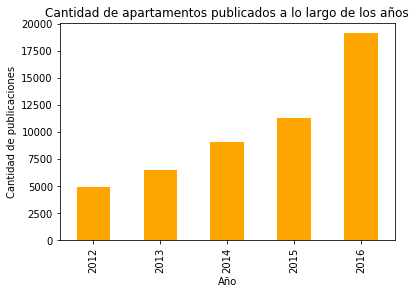

In [60]:
apartamentos.groupby('anio').agg({'id':'count'}).plot(kind='bar',title = 'Cantidad de apartamentos publicados a lo largo de los años',legend = False, color = 'orange')
plt.xlabel('Año')
plt.ylabel('Cantidad de publicaciones')
plt.savefig('CantApartamentosPublicados.png',bbox_inches= 'tight')

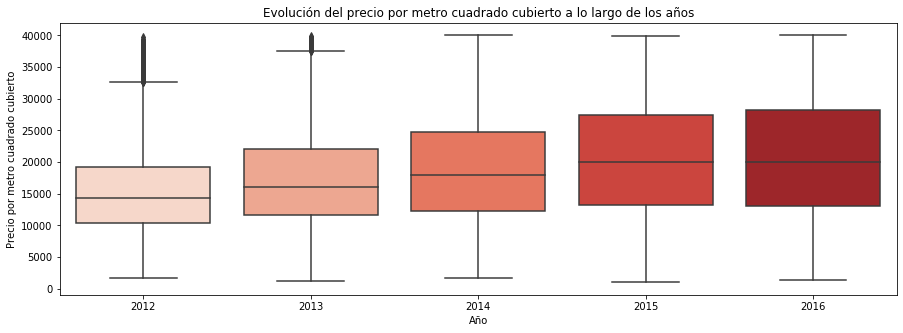

In [61]:
plt.figure(figsize=(15,5))
sns.boxplot(x=apartamentos['anio'], y ='precio_m2', data=apartamentos, palette='Reds')
plt.title('Evolución del precio por metro cuadrado cubierto a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Precio por metro cuadrado cubierto')
plt.savefig('EvolucionPrecioMetroCuadradoApartamentos.png',bbox_inches='tight')

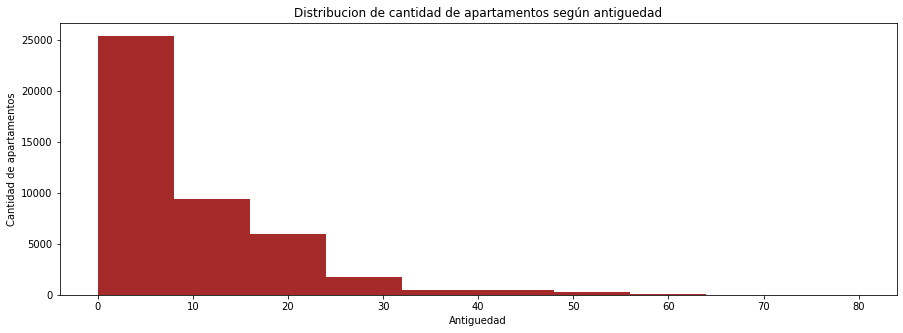

In [69]:
apartamentos.hist(column='antiguedad',figsize=(15,5),color = 'brown',grid=False)
plt.title('Distribucion de cantidad de apartamentos según antiguedad')
plt.xlabel('Antiguedad')
plt.ylabel('Cantidad de apartamentos')
plt.savefig('DistribucionApartamentosPorAntiguedad.png',bbox_inches='tight')

In [34]:
cant_publicaciones_por_apartamento = apartamentos.groupby('ciudad').agg({'id':'count'})
filtro_ciudades = cant_publicaciones_por_apartamento.loc[cant_publicaciones_por_apartamento['id'] > 200]
filtro_ciudades = filtro_ciudades.merge(apartamentos,on='ciudad',how='left')

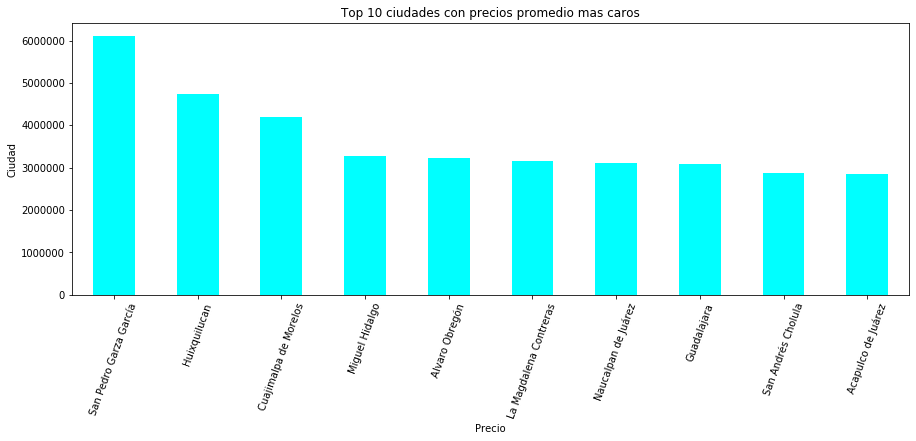

In [64]:
top_10_ciudades_caras = filtro_ciudades.groupby('ciudad').agg({'precio':'mean'}).sort_values('precio',ascending=False).head(10)
top_10_ciudades_caras.plot(figsize=(15,5),kind='bar',rot=70,legend=False,color= 'CYAN',title = 'Top 10 ciudades con precios promedio mas caros')
plt.xlabel('Precio')
plt.ylabel('Ciudad')

plt.savefig('Top10CiudadesCarasApartamentos.png',bbox_inches='tight')


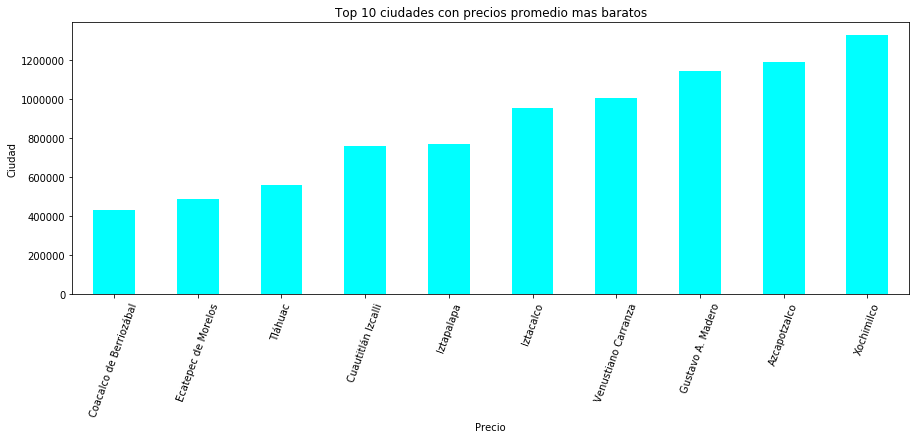

In [66]:
top_10_ciudades_baratas = filtro_ciudades.groupby('ciudad').agg({'precio':'mean'}).sort_values('precio',ascending=True).head(10)
top_10_ciudades_baratas.plot(figsize=(15,5),kind='bar',rot=70,legend=False,color= 'CYAN',title = 'Top 10 ciudades con precios promedio mas baratos')
plt.xlabel('Precio')
plt.ylabel('Ciudad')

plt.savefig('Top10CiudadesBaratasApartamentos.png',bbox_inches='tight')

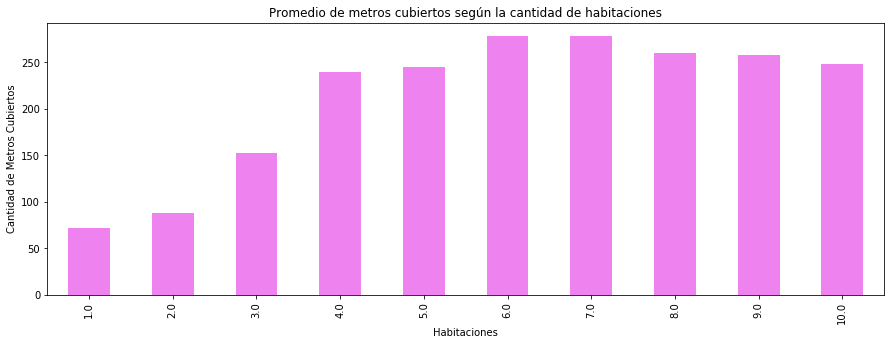

In [71]:
apartamentos.groupby('habitaciones').agg({'metroscubiertos' : 'mean'})\
    .plot(figsize=(15,5),kind='bar',color='violet',legend=False,title='Promedio de metros cubiertos según la cantidad de habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Cantidad de Metros Cubiertos')

plt.savefig('MetrosCubiertosSegunHabitacionesApartamentos.png',bbox_inches='tight')



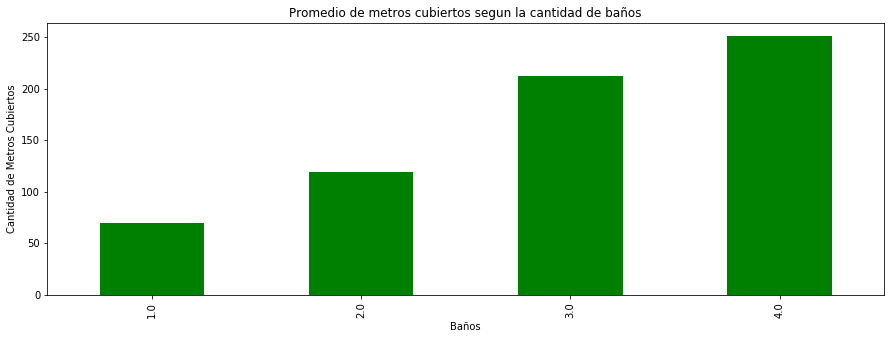

In [73]:
apartamentos.groupby('banos').agg({'metroscubiertos' : 'mean'})\
    .plot(figsize=(15,5),kind='bar',color= 'green',legend=False,title='Promedio de metros cubiertos segun la cantidad de baños')
plt.xlabel('Baños')
plt.ylabel('Cantidad de Metros Cubiertos')

plt.savefig('MetrosCubiertosBanosApartamentos.png',bbox_inches='tight')

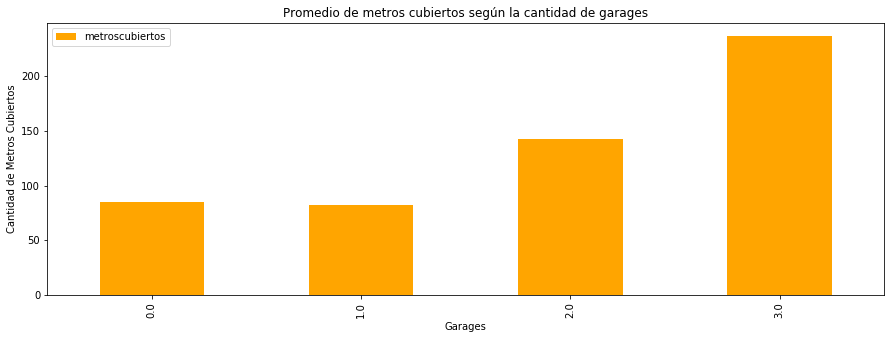

In [75]:
apartamentos.groupby('garages').agg({'metroscubiertos' : 'mean'})\
    .plot(kind='bar',color='orange',figsize=(15,5),title='Promedio de metros cubiertos según la cantidad de garages')
plt.xlabel('Garages')
plt.ylabel('Cantidad de Metros Cubiertos')

plt.savefig('MetrosCubiertosGaragesAparamentos.png',bbox_inches='tight')

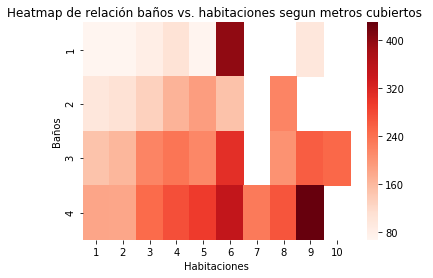

In [76]:
xticks = ['1','2','3','4','5','6','7','8','9','10']
yticks = ['1','2','3','4']
apartamentos_banos_habitaciones = apartamentos.groupby(['banos','habitaciones']).agg({'metroscubiertos' : 'mean'})
apartamentos_banos_habitaciones = apartamentos_banos_habitaciones.unstack()
heatmap_public = sns.heatmap(apartamentos_banos_habitaciones,yticklabels = yticks,xticklabels= xticks,fmt="", cmap='Reds');
plt.xlabel('Habitaciones')
plt.ylabel('Baños')
plt.title('Heatmap de relación baños vs. habitaciones segun metros cubiertos ')

plt.savefig('RelacionBanosHabitacionesMetrosApartamentos.png',bbox_inches='tight')